### Objectives

1. Load the ratings by user information that you collected into a pandas dataframe.
2. Show the average ratings for each user and each movie.
3. Create a new pandas dataframe, with normalized ratings for each user. Again, show the average
ratings for each user and each movie.
4. Provide a text-based conclusion: explain what might be advantages and disadvantages of using
normalized ratings instead of the actual ratings.

#### 1. Load the ratings by user information that you collected into a pandas dataframe.

In [330]:
%matplotlib inline
# bring in NumPy and pandas
import pandas as pd
import numpy as np
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
# mpl.style.use('ggplot')
import seaborn as sns

sns.set(style="whitegrid", color_codes=True)

url="https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
s = requests.get(url).content
s = s.decode('utf-8')
s_rows = s.split('\n')
s_rows_cols = [each.split() for each in s_rows]
tempDf = pd.DataFrame(s_rows_cols)

# replace none values with empty space
for c in tempDf:
   if str(tempDf[c].dtype) in ('object', 'string_', 'unicode_'):
        tempDf[c].fillna(value='', inplace=True)

# set corresponding values for origin
tempDf[7] = tempDf[7].replace(['1', '2', '3'], ['USA', 'Asia', 'Europe'])

# replace missing numeric values with none 
# and convert to numeric in case if number was set to string
tempDf[3] = pd.to_numeric(tempDf[3], errors='coerce')
tempDf[4] = pd.to_numeric(tempDf[4], errors='coerce')
tempDf[1] = pd.to_numeric(tempDf[1], errors='coerce')

# concat 3 columns with names into one
tempDf[8] = tempDf[8] + ' ' + tempDf[9] + ' ' + tempDf[10]

# create new dataframe with named columns
df = tempDf.iloc[:,0:9]
header_row = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']
df.columns = header_row
df


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70,USA,"""chevrolet chevelle malibu"""
1,15.0,8.0,350.0,165.0,3693.0,11.5,70,USA,"""buick skylark 320"""
2,18.0,8.0,318.0,150.0,3436.0,11.0,70,USA,"""plymouth satellite"""
3,16.0,8.0,304.0,150.0,3433.0,12.0,70,USA,"""amc rebel sst"""
4,17.0,8.0,302.0,140.0,3449.0,10.5,70,USA,"""ford torino"""
5,15.0,8.0,429.0,198.0,4341.0,10.0,70,USA,"""ford galaxie 500"""
6,14.0,8.0,454.0,220.0,4354.0,9.0,70,USA,"""chevrolet impala"""
7,14.0,8.0,440.0,215.0,4312.0,8.5,70,USA,"""plymouth fury iii"""
8,14.0,8.0,455.0,225.0,4425.0,10.0,70,USA,"""pontiac catalina"""
9,15.0,8.0,390.0,190.0,3850.0,8.5,70,USA,"""amc ambassador dpl"""


#### 2. Show car cylinder distribution.
Since we have large amount of cars, we just want to see how generallyit's disctributed. We can tell that the majority of cars have 4 cylinders.

In [ ]:
g = sns.barplot(x='car name', y='cylinders', data=df)
plt.xticks(color="white")
plt.xlabel("Cars")
plt.ylabel("Cylinders Number")
g.set_title('Car Cylinder Distribution')


#### 2. Create a scatterplot that shows the relationship between horsepower and weight.
Majority of cars with the higher hoursepower are tend to have a heavier waeight.

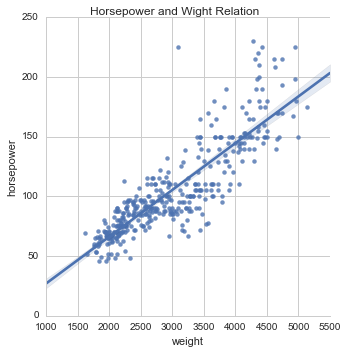

In [334]:
g = sns.lmplot(x='weight', y='horsepower', data=df, fit_reg=True)
sns.plt.suptitle('Horsepower and Wight Relation')


###  Question about the data: display average horsepower per origin, explain the data.
Asia and Europe are pretty close to each other and produce cars with average hoursepower of about 80. USA stand out in comparison to Asia and Europe, because an everage of the horsepower in produced cars is close o 120. Wich is about 65% higher.

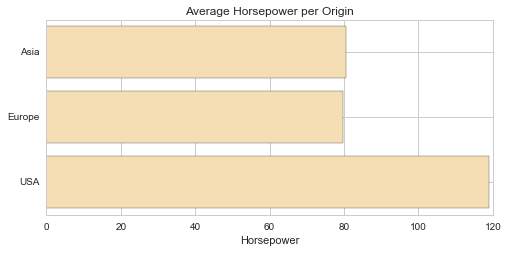

In [333]:
labels = ['USA', 'Europe', 'Asia']
data = [
    df.loc[df['origin'] == labels[0]].horsepower.mean(),
    df.loc[df['origin'] == labels[1]].horsepower.mean(),
    df.loc[df['origin'] == labels[2]].horsepower.mean()
]
y = np.arange(len(data))

# --- plot
width = 0.8
fig, ax = plt.subplots(figsize=(8, 3.5))
ax.barh(y, data, width, color='wheat',align='center')

# --- tidy-up and save
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.xaxis.grid(True)

ax.set_xlabel('Horsepower')
ax.set_title("Average Horsepower per Origin")


